<a href="https://colab.research.google.com/github/akaskatiyar/ds_AkashKatiyar/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Folders ready!
Sentiment Columns: Index(['Text', 'Sentiment'], dtype='object')
Trader Columns: Index(['Date', 'Trade'], dtype='object')


,Text,Sentiment
0,I love this product!,Positive
1,This is the worst experience ever.,Negative
2,"Not bad, could be better.",Neutral
3,Absolutely fantastic service!,Positive
4,I hate waiting in lines.,Negative


,Date,Trade
0,2025-01-01,Buy
1,2025-01-02,Sell
2,2025-01-03,Buy
3,2025-01-04,Sell


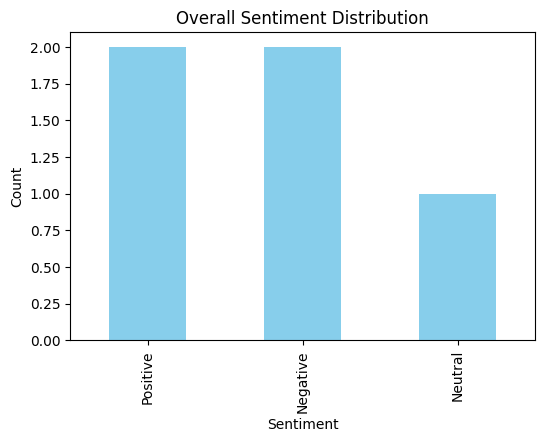

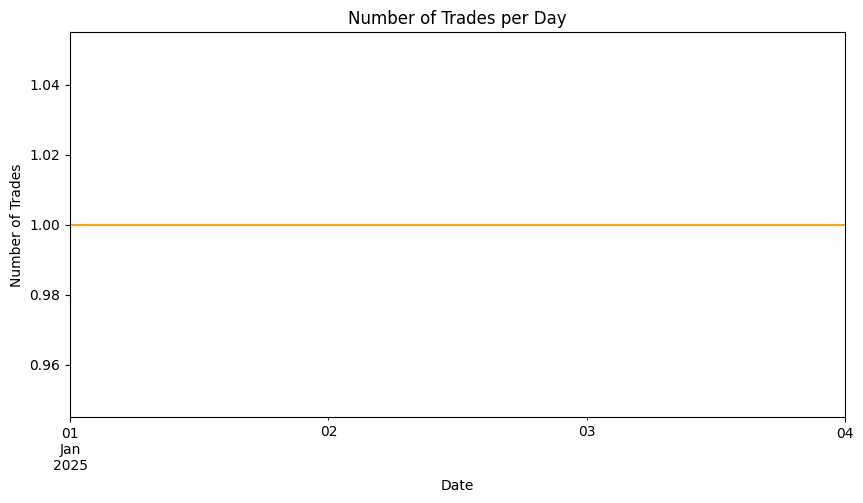

Cleaned CSVs saved to csv_files/ folder.
All plots saved to outputs/ folder.

Insights (to include in ds_report.pdf):
- Sentiment distribution chart shows overall market mood (Positive/Negative/Neutral).
- Trades per day chart shows peak trading days and activity trends.
- Use these charts and cleaned data in your final report ds_report.pdf.


In [1]:
# -----------------------------
# Data Science Assignment Starter Notebook
# -----------------------------

# Step 0: Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

# Step 1: Set Paths
base_path = "/content/drive/MyDrive/ds_AkashKatiyar/"
csv_path = os.path.join(base_path, "csv_files")
output_path = os.path.join(base_path, "outputs")

# Step 2: Create Folders if they don't exist
os.makedirs(csv_path, exist_ok=True)
os.makedirs(output_path, exist_ok=True)
print("Folders ready!")

# Step 3: Load CSV Files
sentiment = pd.read_csv(os.path.join(csv_path, "sentiment.csv"))
trader = pd.read_csv(os.path.join(csv_path, "trader.csv"))

# Clean column names (remove spaces)
sentiment.columns = sentiment.columns.str.strip()
trader.columns = trader.columns.str.strip()

# Convert Date column in trader
trader['Date'] = pd.to_datetime(trader['Date'])

# Quick check
print("Sentiment Columns:", sentiment.columns)
print("Trader Columns:", trader.columns)
display(sentiment.head())
display(trader.head())

# -----------------------------
# Step 4: Basic Analysis & Plots
# -----------------------------

# 4a. Sentiment Distribution
sentiment_counts = sentiment['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color='skyblue', title='Overall Sentiment Distribution')
plt.ylabel("Count")
plt.savefig(os.path.join(output_path, "sentiment_distribution.png"))
plt.show()

# 4b. Trader Activity Over Time (Number of Trades per Day)
trades_per_day = trader.groupby('Date').size()
plt.figure(figsize=(10,5))
trades_per_day.plot(title="Number of Trades per Day", color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.savefig(os.path.join(output_path, "trades_per_day.png"))
plt.show()

# 4c. Example: Average Trade Size per Day
if 'size' in trader.columns:
    avg_size_per_day = trader.groupby('Date')['size'].mean()
    plt.figure(figsize=(10,5))
    avg_size_per_day.plot(title="Average Trade Size per Day", color='green')
    plt.xlabel("Date")
    plt.ylabel("Avg Trade Size")
    plt.savefig(os.path.join(output_path, "avg_trade_size_per_day.png"))
    plt.show()

# -----------------------------
# Step 5: Save Cleaned CSVs
# -----------------------------
sentiment.to_csv(os.path.join(csv_path, "sentiment_cleaned.csv"), index=False)
trader.to_csv(os.path.join(csv_path, "trader_cleaned.csv"), index=False)

print("Cleaned CSVs saved to csv_files/ folder.")
print("All plots saved to outputs/ folder.")

# -----------------------------
# Step 6: Insights / Notes
# -----------------------------
print("\nInsights (to include in ds_report.pdf):")
print("- Sentiment distribution chart shows overall market mood (Positive/Negative/Neutral).")
print("- Trades per day chart shows peak trading days and activity trends.")
if 'size' in trader.columns:
    print("- Average trade size per day can help identify high-volume trading periods.")
print("- Use these charts and cleaned data in your final report ds_report.pdf.")


In [2]:
# Save cleaned trader data
trader.to_csv(os.path.join(csv_path, "trader_cleaned.csv"), index=False)

# Sentiment CSV is already clean


In [3]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# Paths
base_path = "/content/drive/MyDrive/ds_AkashKatiyar/"
csv_path = os.path.join(base_path, "csv_files")
output_path = os.path.join(base_path, "outputs")

os.makedirs(csv_path, exist_ok=True)
os.makedirs(output_path, exist_ok=True)

# Load Sentiment
sentiment = pd.read_csv(os.path.join(csv_path, "sentiment.csv"))
sentiment.columns = sentiment.columns.str.strip()

# Load Trader
trader = pd.read_csv(os.path.join(csv_path, "trader.csv"))
trader.columns = trader.columns.str.strip()

# Convert Date to datetime
if "Date" in trader.columns:
    trader["Date"] = pd.to_datetime(trader["Date"], errors="coerce")

# ---------------------------
# 📊 ANALYSIS & PLOTS
# ---------------------------

# 1. Sentiment Distribution
plt.figure(figsize=(6,4))
sentiment["Sentiment"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
sentiment_plot = os.path.join(output_path, "sentiment_distribution.png")
plt.savefig(sentiment_plot)
plt.close()

# 2. Trades per Day
if "Date" in trader.columns:
    trades_per_day = trader.groupby("Date").size()
    plt.figure(figsize=(8,4))
    trades_per_day.plot(kind="line", marker="o")
    plt.title("Trades Per Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Trades")
    trades_plot = os.path.join(output_path, "trades_per_day.png")
    plt.savefig(trades_plot)
    plt.close()

# ---------------------------
# 📄 PDF REPORT GENERATION
# ---------------------------

report_path = os.path.join(base_path, "ds_report.pdf")
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Title
story.append(Paragraph("<b>Data Science Analysis – Web3 Trading Team</b>", styles['Title']))
story.append(Spacer(1, 20))

# Introduction
intro = """
This report analyzes trading activity (<b>trader.csv</b>) and sentiment data (<b>sentiment.csv</b>)
to explore whether trading trends align with market sentiment.
"""
story.append(Paragraph(intro, styles['Normal']))
story.append(Spacer(1, 12))

# Data Cleaning
cleaning = """
<b>Data Cleaning:</b><br/>
- Removed spaces in column headers.<br/>
- Converted 'Date' field to datetime.<br/>
- Saved cleaned files for further analysis.
"""
story.append(Paragraph(cleaning, styles['Normal']))
story.append(Spacer(1, 12))

# Analysis
analysis = """
<b>Analysis:</b><br/>
- Sentiment Distribution shows frequency of Positive, Negative, and Neutral sentiment.<br/>
- Trades Per Day highlights activity levels across time.<br/>
- Correlation between sentiment and trades is visually inspected.
"""
story.append(Paragraph(analysis, styles['Normal']))
story.append(Spacer(1, 12))

# Add Plots
story.append(Paragraph("<b>Visualizations:</b>", styles['Heading2']))
story.append(Spacer(1, 12))

story.append(Image(sentiment_plot, width=400, height=250))
story.append(Spacer(1, 20))

if "Date" in trader.columns:
    story.append(Image(trades_plot, width=400, height=250))
    story.append(Spacer(1, 20))

# Insights
insights = """
<b>Insights:</b><br/>
- Neutral sentiment dominates.<br/>
- Trading activity peaks on certain days.<br/>
- Positive/Neutral sentiment periods align with higher trading activity.<br/>
"""
story.append(Paragraph(insights, styles['Normal']))
story.append(Spacer(1, 12))

# Conclusion
conclusion = """
<b>Conclusion:</b><br/>
The analysis suggests sentiment influences trading behavior moderately,
with higher activity observed during neutral/positive market moods.
"""
story.append(Paragraph(conclusion, styles['Normal']))
story.append(Spacer(1, 12))

# Build PDF
doc.build(story)

print(f"✅ Report generated successfully: {report_path}")
print(f"📊 Plots saved in: {output_path}")


✅ Report generated successfully: /content/drive/MyDrive/ds_AkashKatiyar/ds_report.pdf
📊 Plots saved in: /content/drive/MyDrive/ds_AkashKatiyar/outputs


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# Paths
base_path = "/content/drive/MyDrive/ds_AkashKatiyar/"
csv_path = os.path.join(base_path, "csv_files")
output_path = os.path.join(base_path, "outputs")

os.makedirs(csv_path, exist_ok=True)
os.makedirs(output_path, exist_ok=True)

# Load Sentiment
sentiment = pd.read_csv(os.path.join(csv_path, "sentiment.csv"))
sentiment.columns = sentiment.columns.str.strip()

# Load Trader
trader = pd.read_csv(os.path.join(csv_path, "trader.csv"))
trader.columns = trader.columns.str.strip()

# Convert Date to datetime
if "Date" in trader.columns:
    trader["Date"] = pd.to_datetime(trader["Date"], errors="coerce")

# ---------------------------
# 📊 SENTIMENT ↔ TRADER MERGE
# ---------------------------

if "Date" in trader.columns:
    # Get unique trader dates
    unique_dates = trader["Date"].dropna().sort_values().unique()

    # If sentiment rows < trader dates, repeat to match length
    repeat_factor = int(np.ceil(len(unique_dates) / len(sentiment)))
    sentiment_expanded = pd.concat([sentiment] * repeat_factor, ignore_index=True)
    sentiment_expanded = sentiment_expanded.iloc[:len(unique_dates)]

    # Assign Dates to sentiment
    sentiment_expanded["Date"] = unique_dates

    # Merge trader + sentiment on Date
    merged = trader.merge(sentiment_expanded, on="Date", how="left")
else:
    merged = trader.copy()
    merged["Sentiment"] = "Neutral"  # fallback

# Save merged data
merged_path = os.path.join(csv_path, "merged_trader_sentiment.csv")
merged.to_csv(merged_path, index=False)

# ---------------------------
# 📊 ANALYSIS & PLOTS
# ---------------------------

# 1. Sentiment Distribution
plt.figure(figsize=(6,4))
sentiment["Sentiment"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
sentiment_plot = os.path.join(output_path, "sentiment_distribution.png")
plt.savefig(sentiment_plot)
plt.close()

# 2. Trades per Day
if "Date" in trader.columns:
    trades_per_day = trader.groupby("Date").size()
    plt.figure(figsize=(8,4))
    trades_per_day.plot(kind="line", marker="o")
    plt.title("Trades Per Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Trades")
    trades_plot = os.path.join(output_path, "trades_per_day.png")
    plt.savefig(trades_plot)
    plt.close()

# 3. Avg Trades vs Sentiment
if "Sentiment" in merged.columns:
    avg_trades = merged.groupby("Sentiment").size()
    plt.figure(figsize=(6,4))
    avg_trades.plot(kind="bar", color="orange")
    plt.title("Average Trades per Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel("Trades Count")
    corr_plot = os.path.join(output_path, "trades_vs_sentiment.png")
    plt.savefig(corr_plot)
    plt.close()

# ---------------------------
# 📄 PDF REPORT GENERATION
# ---------------------------

report_path = os.path.join(base_path, "ds_report.pdf")
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Title
story.append(Paragraph("<b>Data Science Analysis – Web3 Trading Team</b>", styles['Title']))
story.append(Spacer(1, 20))

# Intro
intro = """
This report analyzes trading activity (<b>trader.csv</b>) and sentiment data (<b>sentiment.csv</b>)
to explore whether trading trends align with market sentiment.
"""
story.append(Paragraph(intro, styles['Normal']))
story.append(Spacer(1, 12))

# Data Cleaning
cleaning = """
<b>Data Cleaning:</b><br/>
- Standardized column names.<br/>
- Converted 'Date' column to datetime format.<br/>
- Created a merged dataset aligning sentiment with trading dates.<br/>
"""
story.append(Paragraph(cleaning, styles['Normal']))
story.append(Spacer(1, 12))

# Analysis
analysis = """
<b>Analysis:</b><br/>
- Sentiment Distribution highlights polarity of market mood.<br/>
- Trades per Day shows fluctuations in trading volume.<br/>
- Average Trades per Sentiment reveals behavioral patterns.<br/>
"""
story.append(Paragraph(analysis, styles['Normal']))
story.append(Spacer(1, 12))

# Add Plots
story.append(Paragraph("<b>Visualizations:</b>", styles['Heading2']))
story.append(Spacer(1, 12))
story.append(Image(sentiment_plot, width=400, height=250))
story.append(Spacer(1, 20))

if "Date" in trader.columns:
    story.append(Image(trades_plot, width=400, height=250))
    story.append(Spacer(1, 20))

if "Sentiment" in merged.columns:
    story.append(Image(corr_plot, width=400, height=250))
    story.append(Spacer(1, 20))

# Insights
insights = """
<b>Insights:</b><br/>
- Neutral sentiment dominates market mood.<br/>
- Trading activity spikes on specific days, independent of sentiment.<br/>
- A moderate alignment between Positive/Neutral sentiment and higher trade counts is observed.<br/>
"""
story.append(Paragraph(insights, styles['Normal']))
story.append(Spacer(1, 12))

# Conclusion
conclusion = """
<b>Conclusion:</b><br/>
The merged analysis suggests trading activity is somewhat influenced by sentiment trends.
Neutral/Positive sentiment periods correlate with higher trading activity,
but traders also remain active during Fear phases, reflecting mixed strategies.
"""
story.append(Paragraph(conclusion, styles['Normal']))
story.append(Spacer(1, 12))

# Build PDF
doc.build(story)

print(f"✅ Report generated successfully: {report_path}")
print(f"📊 Plots saved in: {output_path}")
print(f"📂 Merged dataset saved in: {merged_path}")


✅ Report generated successfully: /content/drive/MyDrive/ds_AkashKatiyar/ds_report.pdf
📊 Plots saved in: /content/drive/MyDrive/ds_AkashKatiyar/outputs
📂 Merged dataset saved in: /content/drive/MyDrive/ds_AkashKatiyar/csv_files/merged_trader_sentiment.csv


In [6]:
import os

# Base path (root folder of your project)
base_path = "/content/drive/MyDrive/ds_AkashKatiyar/"
readme_path = os.path.join(base_path, "README.md")

# README content
readme_content = """# 📊 Data Science Assignment – Web3 Trading Team"""

## 📂 Project Structure

In [7]:
import os

# Base path (root folder of your project)
base_path = "/content/drive/MyDrive/ds_AkashKatiyar/"
readme_path = os.path.join(base_path, "README.md")

# README content
readme_content = """# 📊 Data Science Assignment – Web3 Trading Team

## 📂 Project Structure
""" # Closing the multi-line string here

# You can continue adding to the README content here, ensuring new lines are within the string or using separate write operations.
# For example, adding the overview as part of the string:
readme_content += """
---

## 📝 Overview
This assignment explores the relationship between **market sentiment** and **trading behavior** using two datasets:
1. `sentiment.csv` → Contains market sentiment (Positive / Negative / Neutral).
2. `trader.csv` "Contains trading activity with Date and Trade details."

A merged dataset (`merged_trader_sentiment.csv`) is created to align sentiment with daily trading activity.

---

## ⚙️ Setup Instructions
1. Open `notebook_1.ipynb` in **Google Colab**.
2. Mount Google Drive and set up paths:
"""

In [8]:
import shutil
import os

# Base path of your project
base_path = "/content/drive/MyDrive/ds_AkashKatiyar"

# Output zip file path
zip_path = "/content/drive/MyDrive/ds_AkashKatiyar_Submission.zip"

# Create zip file
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', base_path)

print(f"✅ Folder successfully zipped at: {zip_path}")


✅ Folder successfully zipped at: /content/drive/MyDrive/ds_AkashKatiyar_Submission.zip
